In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#Eğitim için kullanacağımız veri seti
titanic_train_data = pd.read_csv("train.csv")
train_data = titanic_train_data.copy()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
#Test için kullanacağımız veri seti
titanic_test_data = pd.read_csv("test.csv")
test_data = titanic_test_data.copy()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 3 farklı yolcu sınıfı var.
* Fare bilet ya da biletler için ödenen miktarı gösteriyor.
* SibSp sütunu yolcunun kardeşi ya da eşi olup olmadığını gösteriyor. 
* Parch sütunu yolcunun ebeveyn ya da çoçuk sayısını gösteriyor.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Cabin verisinde oldukça fazla kayıp değer var. Kayıp değerleri tahmin etmek ve doldurmak oldukça zor olacağı için muhtemelen bu özelliği kaldırcağız.


# Cinsiyetin Hayatta Kalmayla Olan İlişkisi 

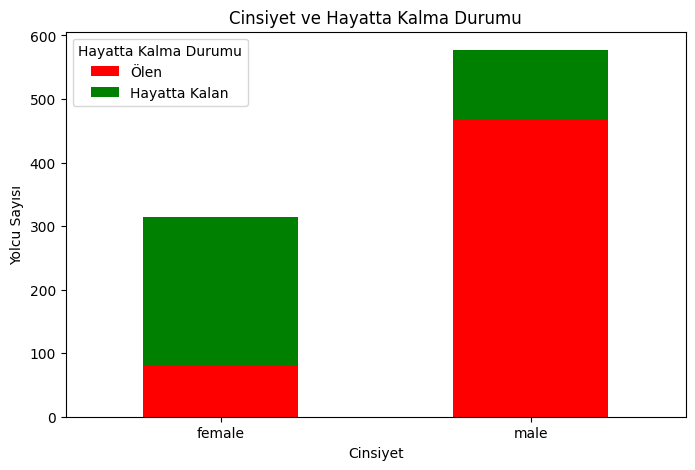

In [6]:
survival_by_gender = train_data.groupby(['Sex', 'Survived']).size().unstack()

# Yığılmış bar plot
survival_by_gender.plot(kind = "bar", stacked = True, color = ["red", "green"], figsize = (8,5))

plt.title("Cinsiyet ve Hayatta Kalma Durumu")
plt.xlabel("Cinsiyet")
plt.ylabel("Yolcu Sayısı")
plt.xticks(rotation=0)
plt.legend(["Ölen", "Hayatta Kalan"], title = "Hayatta Kalma Durumu")

plt.show()

In [13]:
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


* Kadınların %74'ü hayatta kalırken, erkeklerin sadece %18'lik kısmı kurtulmayı başarmış.

# Yolcu Sınıfı ve Hayatta Kalma İlişisi

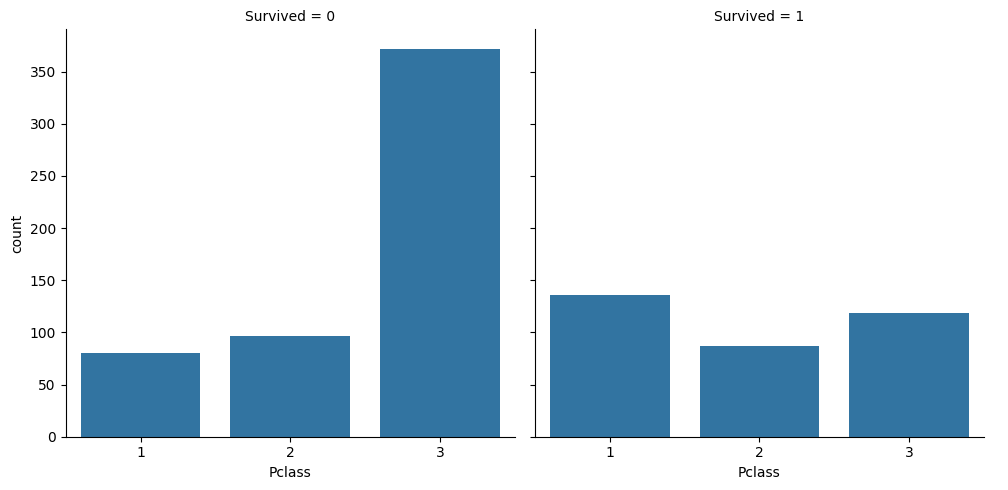

In [14]:
sns.catplot(
    data = train_data, 
    x = "Pclass", 
    col = "Survived",
    kind = "count", 
    height = 5, 
    aspect = 1)

In [15]:
train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* Pclass değeri 3 olan yolcuların büyük bir çoğunluğu kurtulamamış.

# Yaş ve Hayatta Kalma İlişkisi

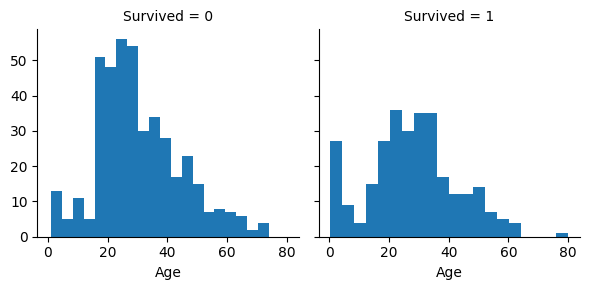

In [16]:
s_map = sns.FacetGrid(train_data, col = "Survived")
s_map.map(plt.hist, "Age", bins = 20)

Hayatta kalma oranı 15 ve 35 yaş arasında oldukça yüksek. Aynı zamanda en yüksek ölüm oranıda bu yaş sınırları arasında. Ayrıca 0-5 yaş arasındaki çocuklarda hayatta kalma oranı oldukça fazla.

# Pclass ve Yaşa Göre Hayatta Kalma Oranları

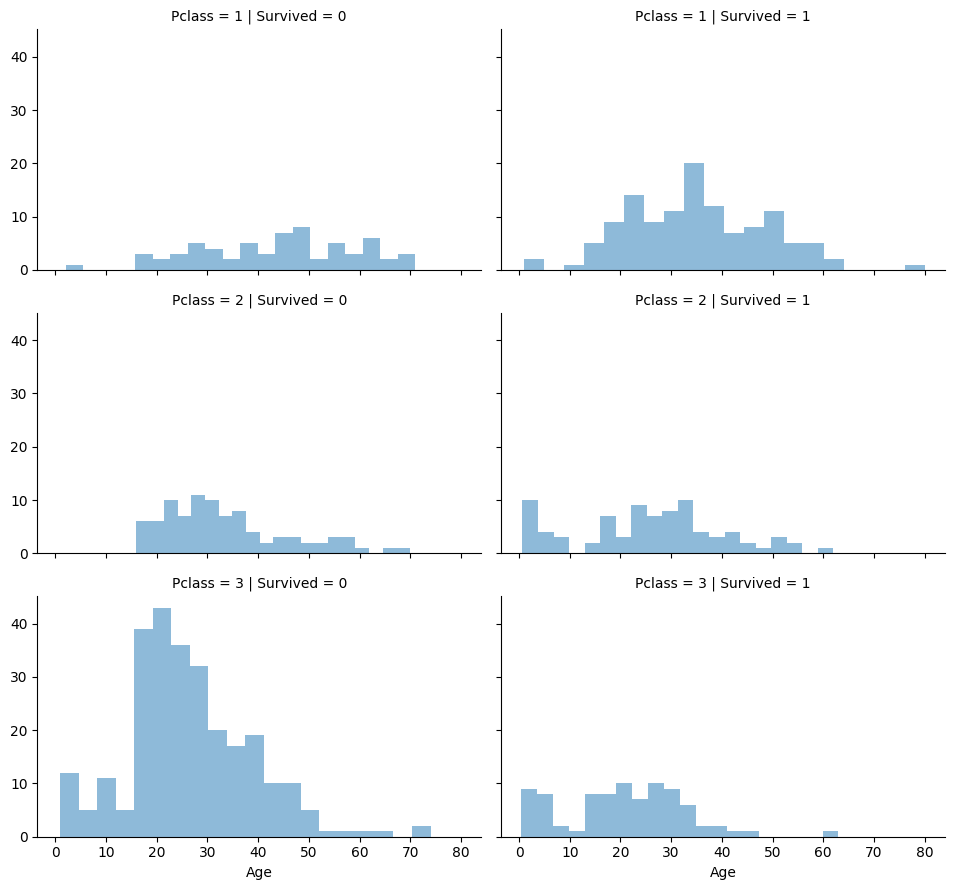

In [18]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# SibSp ve Hayatta Kalma İlişkisi

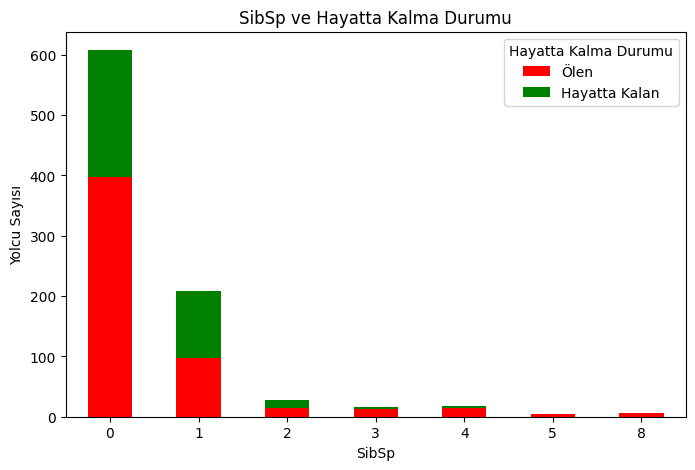

In [19]:
survival_by_gender = train_data.groupby(["SibSp", "Survived"]).size().unstack()

# Yığılmış bar plot
survival_by_gender.plot(kind = "bar", stacked = True, color = ["red", "green"], figsize = (8,5))

plt.title("SibSp ve Hayatta Kalma Durumu")
plt.xlabel("SibSp")
plt.ylabel("Yolcu Sayısı")
plt.xticks(rotation=0)
plt.legend(["Ölen", "Hayatta Kalan"], title = "Hayatta Kalma Durumu")

plt.show()

In [20]:
train_data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Görüldüğü gibi 5 ve 8 kişilik olan ailelerden hayatta kalan olmamış. Tek başına yolculuk yapan kişiler en yüksek hayatta kalma oranına sahip.

# Parch ve Hayatta Kalma İlişkisi 

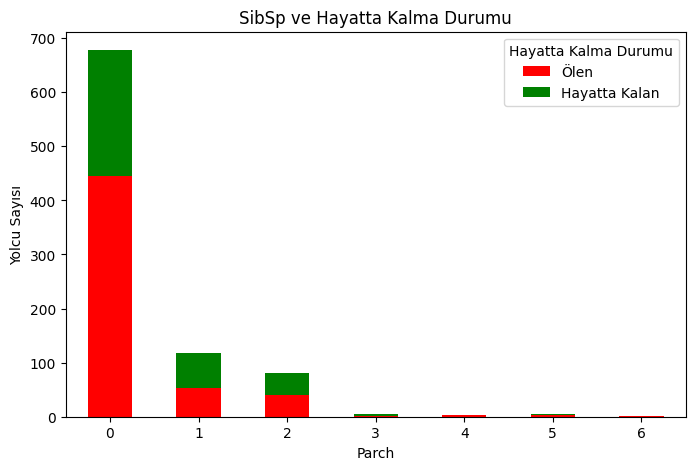

In [21]:
survival_by_gender = train_data.groupby(["Parch", "Survived"]).size().unstack()

# Yığılmış bar plot
survival_by_gender.plot(kind = "bar", stacked = True, color = ["red", "green"], figsize = (8,5))

plt.title("SibSp ve Hayatta Kalma Durumu")
plt.xlabel("Parch")
plt.ylabel("Yolcu Sayısı")
plt.xticks(rotation=0)
plt.legend(["Ölen", "Hayatta Kalan"], title = "Hayatta Kalma Durumu")

plt.show()

In [22]:
train_data[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Gördüğümüz gibi 4 ve 6 kişilik ailelerden hayatta kalan olmamış. En çok hayatta kalma oranı 3 kişilik ailelerde. 

# Embarked ve Cinsiyete Göre Hayatta Kalma Oranları

C:\Users\tekel\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


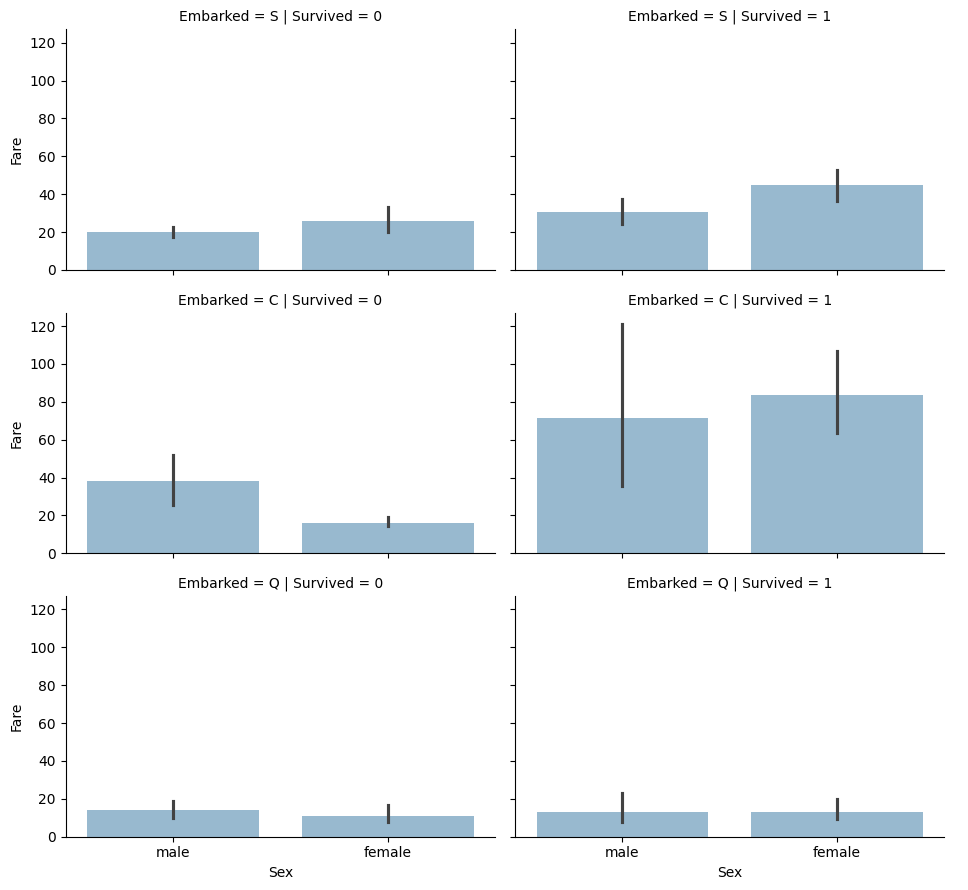

In [27]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()

# Veri Ön İşleme 1

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Modelleri eğitirken kullanmayacağımız "PassengerId", "Name", "Ticket" ve "Cabin" değerlerini eğitim setinden çıkarıyoruz.

In [120]:
# Kullanmayacağımız özellikleri çıkardık
train_data.drop(columns=(["PassengerId", "Name", "Ticket", "Cabin"]), axis = 1, inplace = True)

In [121]:
train_data["Sex"] = train_data["Sex"].map({"female": 0, "male": 1})
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [122]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [123]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [125]:
print(train_data["Embarked"].value_counts())

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64


In [97]:
train_data["Embarked"] = train_data["Embarked"].fillna(0.0)

In [128]:
y = train_data["Survived"]
X = train_data.drop("Survived", axis = 1)

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
train_data["Embarked"] = train_data["Embarked"].replace({None: np.nan})


In [127]:
train_data["Embarked"] = train_data["Embarked"].fillna(0.0)

In [228]:
print(X_test.dtypes)

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [230]:
X_test.drop(columns=(["Name", "Ticket", "Cabin"]), axis = 1, inplace = True)

In [231]:
X_test["Sex"] = X_test["Sex"].map({"female": 0, "male": 1})
X_test["Embarked"] = X_test["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [233]:
X_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [241]:
X_test["Age"] = X_test["Age"].fillna(train_data["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

# Model 1 Eğitimi

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
X_train.shape

(623, 7)

In [131]:
model_1 = Sequential()

model_1.add(Dense(units = 4, activation = "relu"))
model_1.add(Dense(units = 4, activation = "relu"))
model_1.add(Dense(units = 4, activation = "relu"))
model_1.add(Dense(units = 1, activation = "sigmoid"))

model_1.compile(loss = "binary_crossentropy", optimizer = "adam")

In [139]:
model_1.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1498 - val_loss: 3.3577
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1071 - val_loss: 2.6683
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5242 - val_loss: 2.1492
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0694 - val_loss: 1.7708
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6656 - val_loss: 1.4943
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3417 - val_loss: 1.2907
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2431 - val_loss: 1.1371
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0926 - val_loss: 1.0243
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0021 - val_loss: 0.9512
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9038 - val_loss: 0.8995
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8800 - val_loss: 0.8585
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6199 - val_loss: 0.6318
Epoch 70/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6212 - val_loss: 0.6322
Epoch 71/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6251 - val_loss: 0.6301
Epoch 72/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6101 - val_loss: 0.6305
Epoch 73/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6103 - val_loss: 0.6316
Epoch 74/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6194 - val_loss: 0.6301
Epoch 75/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6041 - val_loss: 0.6292
Epoch 76/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5995 - val_loss: 0.6292
Epoch 77/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6221 - val_loss: 0.6289
Epoch 78/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6049 - val_loss: 0.6284
Epoch 79/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5943 - val_loss: 0.6280
Epoch 80/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6050 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5799 - val_loss: 0.6092
Epoch 138/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5860 - val_loss: 0.6132
Epoch 139/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5967 - val_loss: 0.6164
Epoch 140/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5854 - val_loss: 0.6110
Epoch 141/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5627 - val_loss: 0.6128
Epoch 142/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5841 - val_loss: 0.6104
Epoch 143/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5767 - val_loss: 0.6111
Epoch 144/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5704 - val_loss: 0.6098
Epoch 145/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5884 - val_loss: 0.6111
Epoch 146/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6096 - val_loss: 0.6085
Epoch 147/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5656 - val_loss: 0.6088
Epoch 148/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5507 - val_loss: 0.6009
Epoch 205/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5722 - val_loss: 0.6054
Epoch 206/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5875 - val_loss: 0.6029
Epoch 207/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6025 - val_loss: 0.5983
Epoch 208/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5788 - val_loss: 0.6059
Epoch 209/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5897 - val_loss: 0.6025
Epoch 210/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5515 - val_loss: 0.6055
Epoch 211/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5755 - val_loss: 0.5999
Epoch 212/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5878 - val_loss: 0.6039
Epoch 213/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5685 - val_loss: 0.6009
Epoch 214/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5759 - val_loss: 0.6044
Epoch 215/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5444 - val_loss: 0.6103
Epoch 272/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5507 - val_loss: 0.6077
Epoch 273/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5590 - val_loss: 0.6079
Epoch 274/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5692 - val_loss: 0.6065
Epoch 275/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5984 - val_loss: 0.6132
Epoch 276/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5650 - val_loss: 0.6048
Epoch 277/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5745 - val_loss: 0.6119
Epoch 278/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5779 - val_loss: 0.6070
Epoch 279/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5567 - val_loss: 0.6083
Epoch 280/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5458 - val_loss: 0.6085
Epoch 281/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5635 - val_loss: 0.6091
Epoch 282/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5617 - val_loss: 0.6102
Epoch 339/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5545 - val_loss: 0.6108
Epoch 340/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5224 - val_loss: 0.6117
Epoch 341/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5669 - val_loss: 0.6070
Epoch 342/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5585 - val_loss: 0.6089
Epoch 343/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5461 - val_loss: 0.6119
Epoch 344/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5373 - val_loss: 0.6064
Epoch 345/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5287 - val_loss: 0.6078
Epoch 346/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5346 - val_loss: 0.6097
Epoch 347/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5637 - val_loss: 0.6058
Epoch 348/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5454 - val_loss: 0.6141
Epoch 349/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4770 - val_loss: 0.5655
Epoch 406/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4816 - val_loss: 0.5709
Epoch 407/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4711 - val_loss: 0.5674
Epoch 408/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4623 - val_loss: 0.5611
Epoch 409/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4539 - val_loss: 0.5768
Epoch 410/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4699 - val_loss: 0.5685
Epoch 411/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4611 - val_loss: 0.5658
Epoch 412/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4722 - val_loss: 0.5688
Epoch 413/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4877 - val_loss: 0.5680
Epoch 414/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4871 - val_loss: 0.5635
Epoch 415/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4792 - val_loss: 0.5603
Epoch 416/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4567 - val_loss: 0.5633
Epoch 473/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4538 - val_loss: 0.5642
Epoch 474/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4589 - val_loss: 0.5750
Epoch 475/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4535 - val_loss: 0.5603
Epoch 476/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4568 - val_loss: 0.5767
Epoch 477/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4345 - val_loss: 0.5758
Epoch 478/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4476 - val_loss: 0.5711
Epoch 479/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4535 - val_loss: 0.5735
Epoch 480/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4522 - val_loss: 0.5661
Epoch 481/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4918 - val_loss: 0.5626
Epoch 482/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4730 - val_loss: 0.5737
Epoch 483/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

<Axes: >

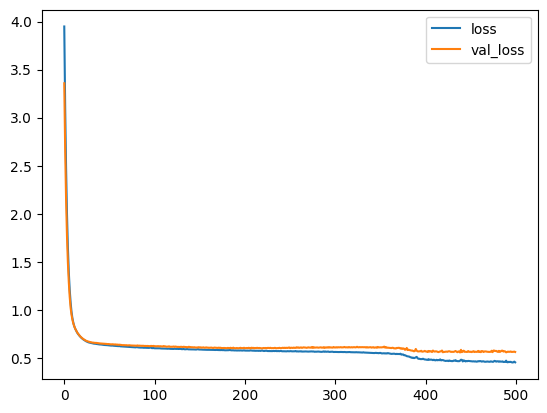

In [140]:
kayip_1 = pd.DataFrame(model_1.history.history)
kayip_1.plot()

In [141]:
y_pred_prob = model_1.predict(X_test)
y_pred_1 = (y_pred_prob > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [142]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_1))

print("Karmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_1))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       157
           1       0.72      0.61      0.66       111

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268

Karmaşıklık Matrisi:
[[131  26]
 [ 43  68]]


# Model 2 EarlyStop

In [195]:
model_2 = Sequential()

model_2.add(Dense(units = 7, activation = "relu"))
model_2.add(Dense(units = 4, activation = "relu"))
model_2.add(Dense(units = 4, activation = "relu"))
model_2.add(Dense(units = 1, activation = "sigmoid"))

model_2.compile(loss = "binary_crossentropy", optimizer = "adam")

In [196]:
earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience=25)

In [197]:
model_2.fit(x = X_train, y = y_train, epochs = 500, validation_data = [X_test, y_test], verbose = 1,
            callbacks = [earlyStopping])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2632 - val_loss: 1.6059
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7222 - val_loss: 1.3071
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6818 - val_loss: 1.1567
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1988 - val_loss: 1.0785
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2835 - val_loss: 1.0118
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9706 - val_loss: 0.9666
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1259 - val_loss: 0.9154
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8137 - val_loss: 0.8824
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7946 - val_loss: 0.8438
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9268 - val_loss: 0.8172
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8254 - val_loss: 0.7960
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5861 - val_loss: 0.5908
Epoch 70/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5919 - val_loss: 0.5902
Epoch 71/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6002 - val_loss: 0.5886
Epoch 72/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5622 - val_loss: 0.5884
Epoch 73/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5811 - val_loss: 0.5879
Epoch 74/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5707 - val_loss: 0.5871
Epoch 75/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5802 - val_loss: 0.5862
Epoch 76/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6013 - val_loss: 0.5850
Epoch 77/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5706 - val_loss: 0.5856
Epoch 78/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5982 - val_loss: 0.5842
Epoch 79/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5815 - val_loss: 0.5846
Epoch 80/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5866 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5582 - val_loss: 0.5510
Epoch 138/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5608 - val_loss: 0.5507
Epoch 139/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5783 - val_loss: 0.5500
Epoch 140/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5520 - val_loss: 0.5494
Epoch 141/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5679 - val_loss: 0.5485
Epoch 142/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5629 - val_loss: 0.5471
Epoch 143/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5520 - val_loss: 0.5460
Epoch 144/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5648 - val_loss: 0.5457
Epoch 145/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5737 - val_loss: 0.5442
Epoch 146/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5591 - val_loss: 0.5447
Epoch 147/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5447 - val_loss: 0.5426
Epoch 148/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5285 - val_loss: 0.4865
Epoch 205/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4958 - val_loss: 0.4856
Epoch 206/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4847 - val_loss: 0.4876
Epoch 207/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4968 - val_loss: 0.4832
Epoch 208/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4922 - val_loss: 0.4848
Epoch 209/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5209 - val_loss: 0.4827
Epoch 210/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4818 - val_loss: 0.4810
Epoch 211/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4995 - val_loss: 0.4797
Epoch 212/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4814 - val_loss: 0.4802
Epoch 213/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5158 - val_loss: 0.4788
Epoch 214/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4584 - val_loss: 0.4766
Epoch 215/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4732 - val_loss: 0.4581
Epoch 272/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4900 - val_loss: 0.4579
Epoch 273/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4874 - val_loss: 0.4596
Epoch 274/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4661 - val_loss: 0.4572
Epoch 275/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5056 - val_loss: 0.4575
Epoch 276/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4687 - val_loss: 0.4584
Epoch 277/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4913 - val_loss: 0.4579
Epoch 278/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4384 - val_loss: 0.4569
Epoch 279/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4928 - val_loss: 0.4569
Epoch 280/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4841 - val_loss: 0.4579
Epoch 281/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4651 - val_loss: 0.4578
Epoch 282/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

<Axes: >

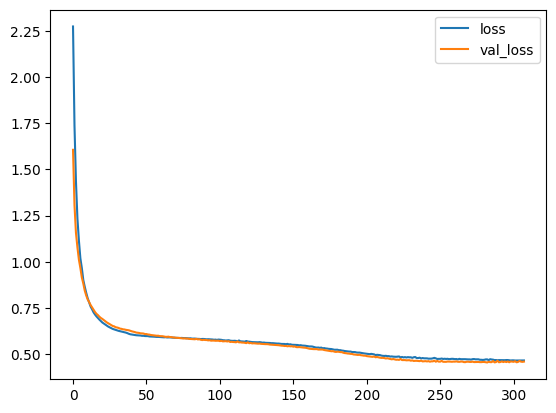

In [198]:
kayip_2= pd.DataFrame(model_2.history.history)
kayip_2.plot()

In [199]:
y_pred_prob = model_2.predict(X_test)
y_pred_2 = (y_pred_prob > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [200]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_2))

print("Karmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_2))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       157
           1       0.75      0.77      0.76       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Karmaşıklık Matrisi:
[[129  28]
 [ 26  85]]


# Model 3 Dropout 

In [201]:
model_3 = Sequential()

model_3.add(Dense(units = 7, activation = "relu"))
model_3.add(Dropout(0.5))

model_3.add(Dense(units = 4, activation = "relu"))
model_3.add(Dropout(0.5))

model_3.add(Dense(units = 4, activation = "relu"))
model_3.add(Dropout(0.5))

model_3.add(Dense(units = 1, activation = "sigmoid"))

model_3.compile(loss = "binary_crossentropy", optimizer = "adam")

In [202]:
model_3.fit(x = X_train, y = y_train, epochs = 500, validation_data = [X_test, y_test], verbose = 1, 
            callbacks = [earlyStopping])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0722 - val_loss: 0.7528
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2416 - val_loss: 0.6877
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5778 - val_loss: 0.6601
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3938 - val_loss: 0.6418
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5324 - val_loss: 0.6351
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0690 - val_loss: 0.6252
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0940 - val_loss: 0.6207
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8502 - val_loss: 0.6247
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9013 - val_loss: 0.6343
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8397 - val_loss: 0.6441
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8515 - val_loss: 0.6527
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8

<Axes: >

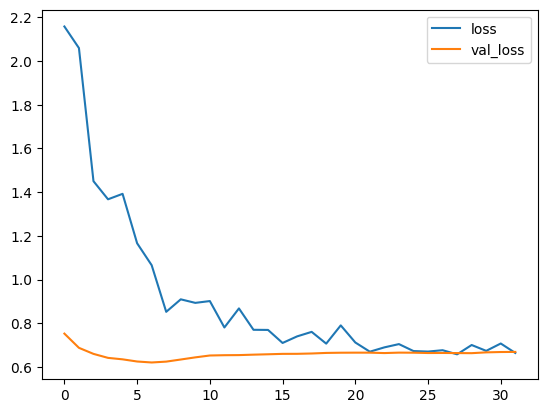

In [203]:
kayip_3 = pd.DataFrame(model_3.history.history)
kayip_3.plot()

In [204]:
y_pred_prob = model_3.predict(X_test)
y_pred_3 = (y_pred_prob > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [205]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_3))

print("Karmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_3))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       157
           1       0.00      0.00      0.00       111

    accuracy                           0.59       268
   macro avg       0.29      0.50      0.37       268
weighted avg       0.34      0.59      0.43       268

Karmaşıklık Matrisi:
[[157   0]
 [111   0]]


C:\Users\tekel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tekel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tekel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Predicts

In [258]:
predictions = model_2.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [259]:
print(predictions.shape)  # Çıktısı muhtemelen (418, 1) veya (n, 1) gibi olacak

(418, 1)


In [260]:
predictions = predictions.ravel()  # veya predictions.flatten()

In [261]:
predictions = np.round(predictions).astype(int)

In [262]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_tf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
